In [33]:
%pip install seaborn
import pandas
from sklearn import linear_model
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pandas.read_csv("lungcancerdataset.csv")
df.head()


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [34]:
"""The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost 
and it also helps the people to take the appropriate decision based on their cancer risk status.

Attribute information:
Total no. of attributes: 16
No .of instances: 284

Gender: M(male), F(female)
Age: Age of the patient
Smoking: YES=2 , NO=1.
Yellow fingers: YES=2 , NO=1.
Anxiety: YES=2 , NO=1.
Peer_pressure: YES=2 , NO=1.
Chronic Disease: YES=2 , NO=1.
Fatigue: YES=2 , NO=1.
Allergy: YES=2 , NO=1.
Wheezing: YES=2 , NO=1.
Alcohol: YES=2 , NO=1.
Coughing: YES=2 , NO=1.
Shortness of Breath: YES=2 , NO=1.
Swallowing Difficulty: YES=2 , NO=1.
Chest pain: YES=2 , NO=1.
Lung Cancer: YES , NO."""

'The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost \nand it also helps the people to take the appropriate decision based on their cancer risk status.\n\nAttribute information:\nTotal no. of attributes: 16\nNo .of instances: 284\n\nGender: M(male), F(female)\nAge: Age of the patient\nSmoking: YES=2 , NO=1.\nYellow fingers: YES=2 , NO=1.\nAnxiety: YES=2 , NO=1.\nPeer_pressure: YES=2 , NO=1.\nChronic Disease: YES=2 , NO=1.\nFatigue: YES=2 , NO=1.\nAllergy: YES=2 , NO=1.\nWheezing: YES=2 , NO=1.\nAlcohol: YES=2 , NO=1.\nCoughing: YES=2 , NO=1.\nShortness of Breath: YES=2 , NO=1.\nSwallowing Difficulty: YES=2 , NO=1.\nChest pain: YES=2 , NO=1.\nLung Cancer: YES , NO.'

In [35]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [36]:
df.isnull().sum()
print("-----------------------------------------------")
print(df.duplicated())
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.info()


-----------------------------------------------
0      False
1      False
2      False
3      False
4      False
       ...  
304     True
305     True
306     True
307     True
308     True
Length: 309, dtype: bool
<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING        

In [37]:
from sklearn.preprocessing import LabelEncoder
encoda = LabelEncoder()
df['LUNG_CANCER']=encoda.fit_transform(df['LUNG_CANCER'])
df['GENDER']=encoda.fit_transform(df['GENDER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


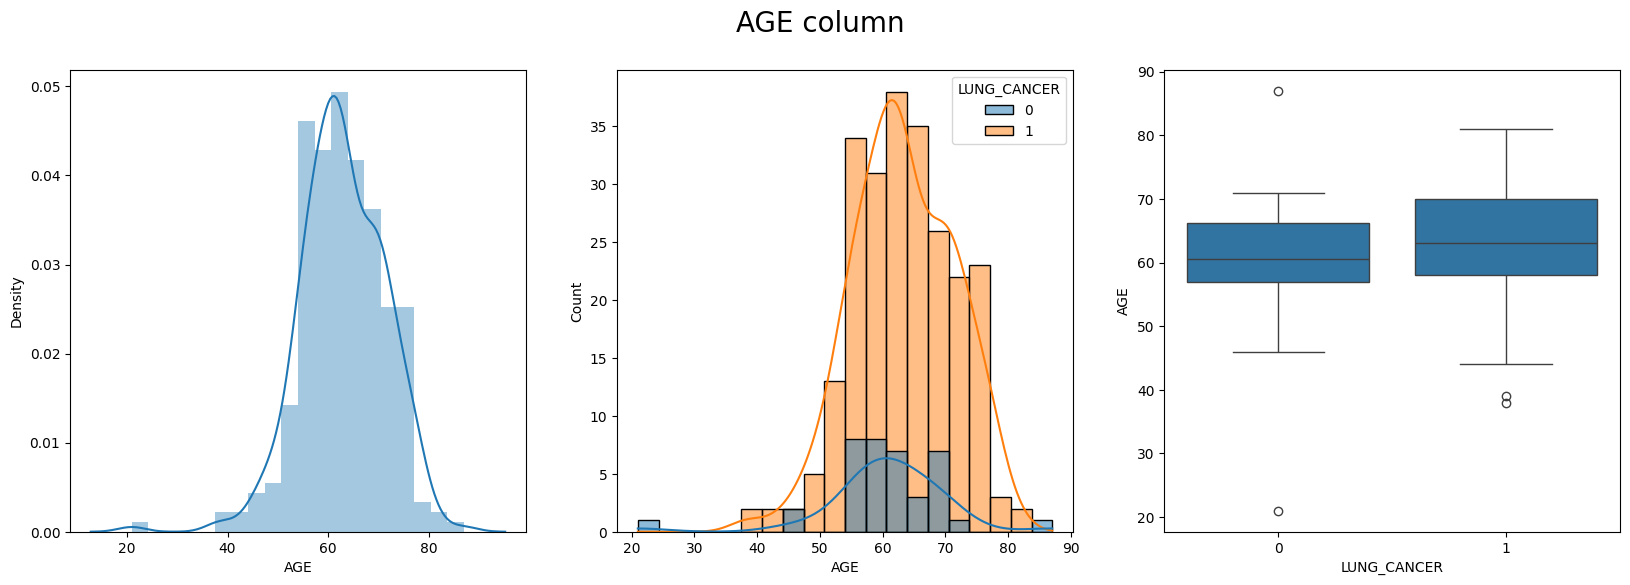

<Axes: >

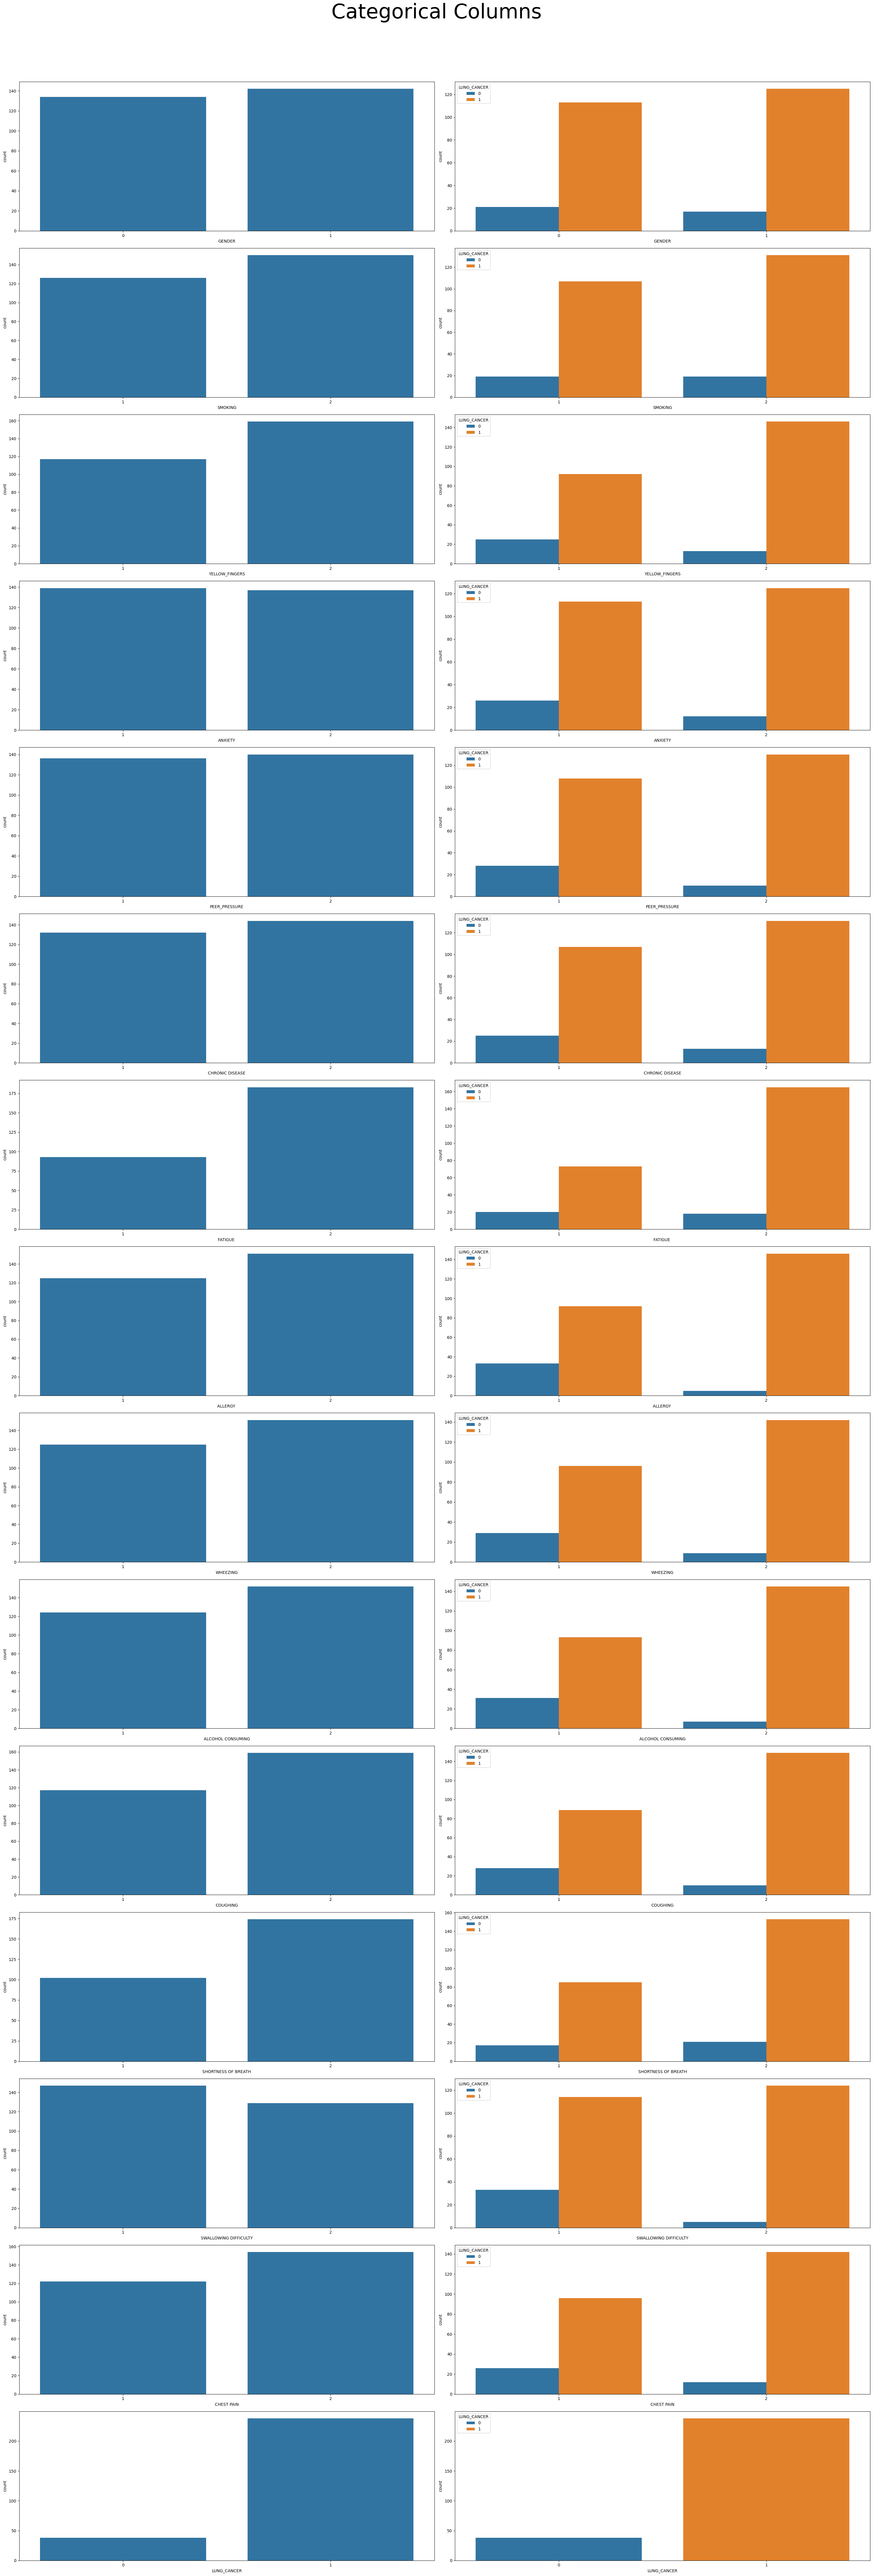

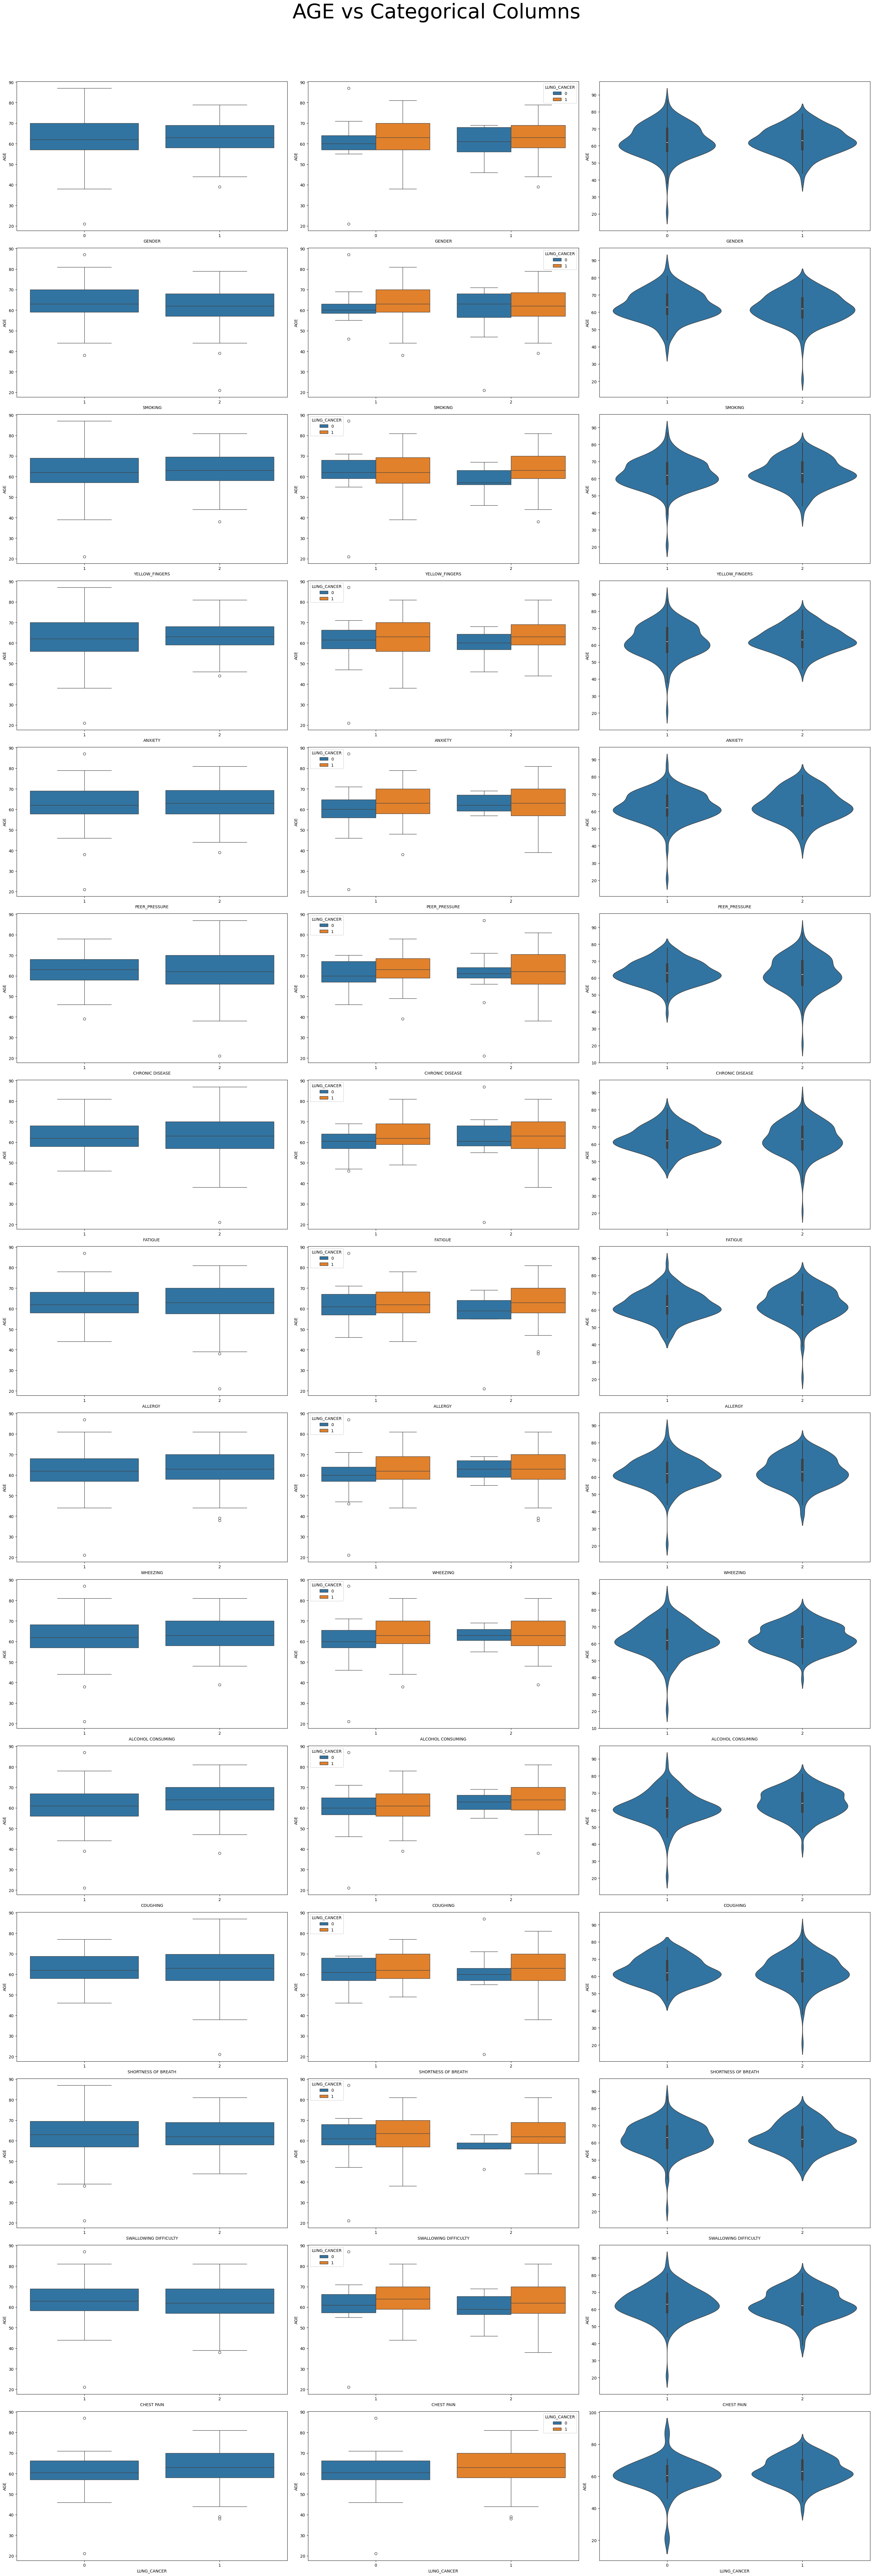

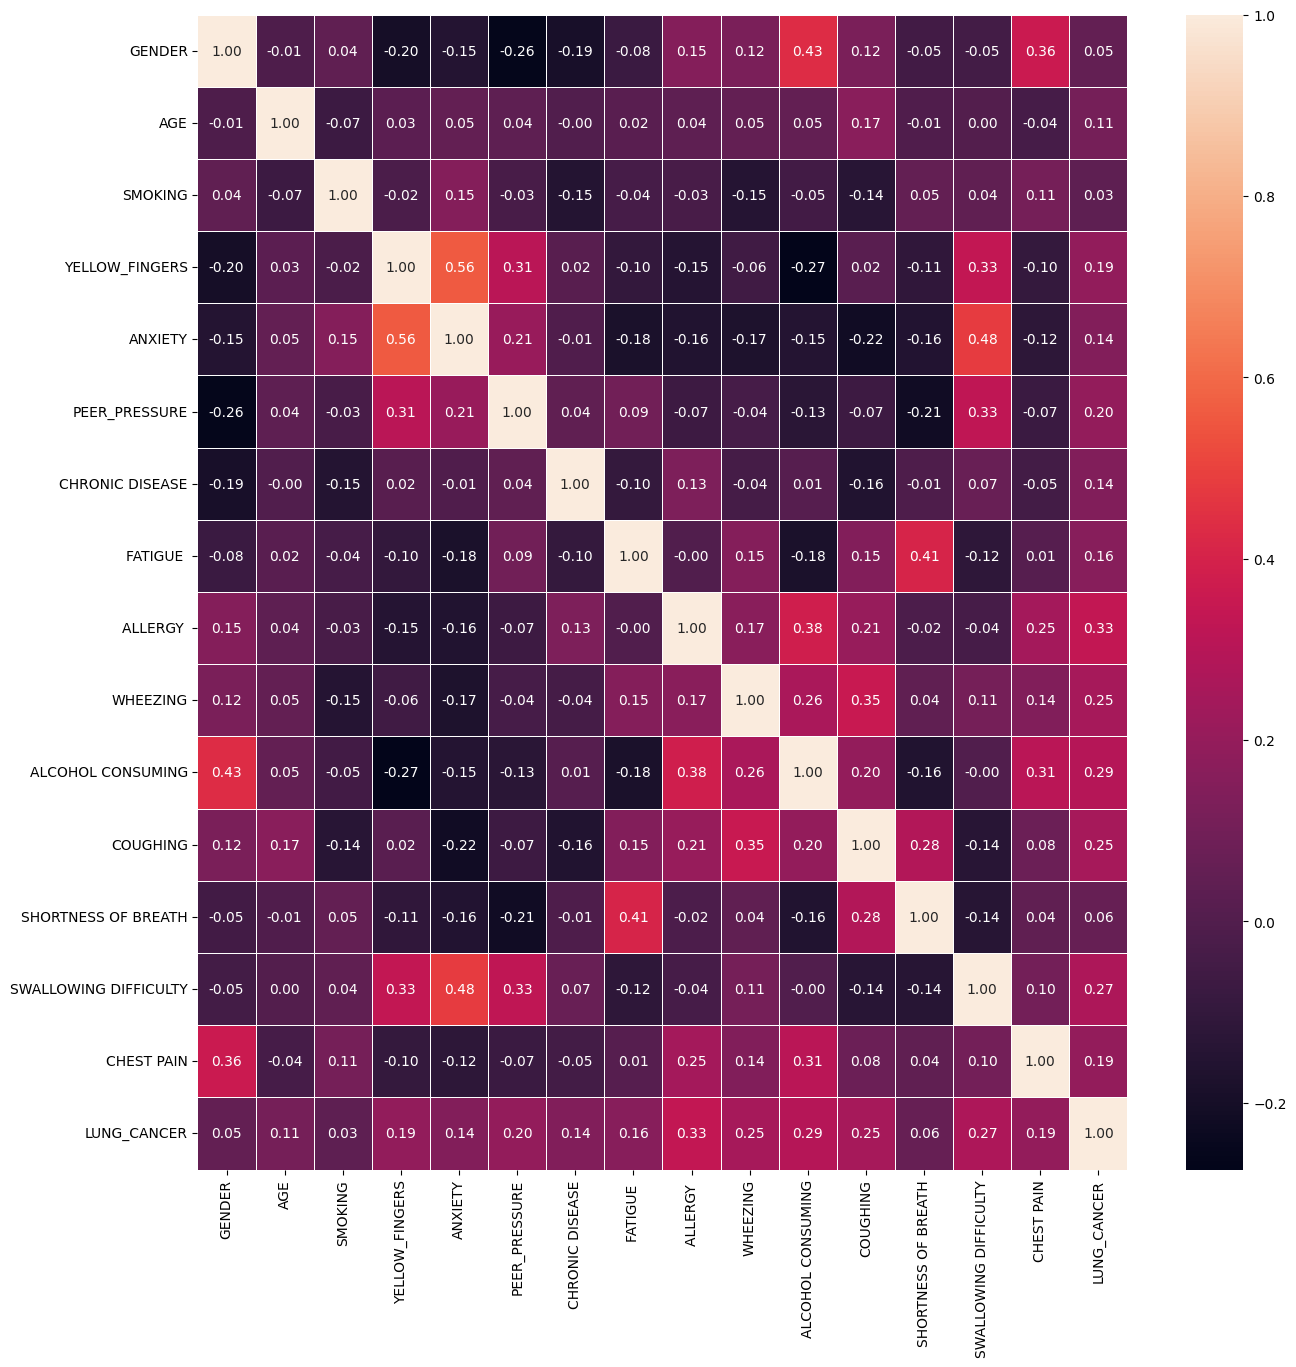

In [38]:
#separating continuous and categorical columns
con_col = ['AGE']
cat_col=[]
for i in df.columns:
    if i!='AGE':
        cat_col.append(i)

import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(df['AGE'],ax=ax[0])
sns.histplot(data =df,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=df['LUNG_CANCER'],y=df['AGE'],ax=ax[2])
plt.suptitle("AGE column",size=20)
plt.show()

fig,ax = plt.subplots(15,2,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.countplot(data=df,x=i,ax=ax[index,0])
    sns.countplot(data=df,x=i,ax=ax[index,1],hue='LUNG_CANCER')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Categorical Columns",fontsize=50)

fig,ax = plt.subplots(15,3,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.boxplot(x=df[i],y=df['AGE'],ax=ax[index,0])
    sns.boxplot(x=df[i],y=df['AGE'],ax=ax[index,1],hue=df['LUNG_CANCER'])
    sns.violinplot(x=df[i],y=df['AGE'],ax=ax[index,2])
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("AGE vs Categorical Columns",fontsize=50)

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='0.2f')

In [39]:
X=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']
e = {1:0,2:1}
for j in range(2,len(X.columns)):
    X[X.columns[j]] = X[X.columns[j]].map(e)
X.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


In [40]:
%pip install imblearn
from imblearn.over_sampling import RandomOverSampler
X_over,y_over=RandomOverSampler().fit_resample(X,y)

#random state 42
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['AGE']=scaler.fit_transform(X_train[['AGE']])
X_test['AGE']=scaler.transform(X_test[['AGE']])
X_train.head()


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Train shape : (357, 15)
Test shape: (119, 15)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
321,0,-0.045664,0,0,0,0,1,1,0,0,0,0,1,0,0
336,0,-0.607798,0,1,1,0,0,0,0,0,0,1,0,0,0
334,0,-0.382944,0,0,0,1,0,1,0,1,0,1,1,0,1
151,0,0.179190,1,1,0,1,1,0,0,0,0,0,0,0,0
314,0,0.628898,1,0,1,0,0,1,0,0,0,0,0,0,0


Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')


Train Data Accuracy:  1.0
Test Data Accuracy:  0.9495798319327731


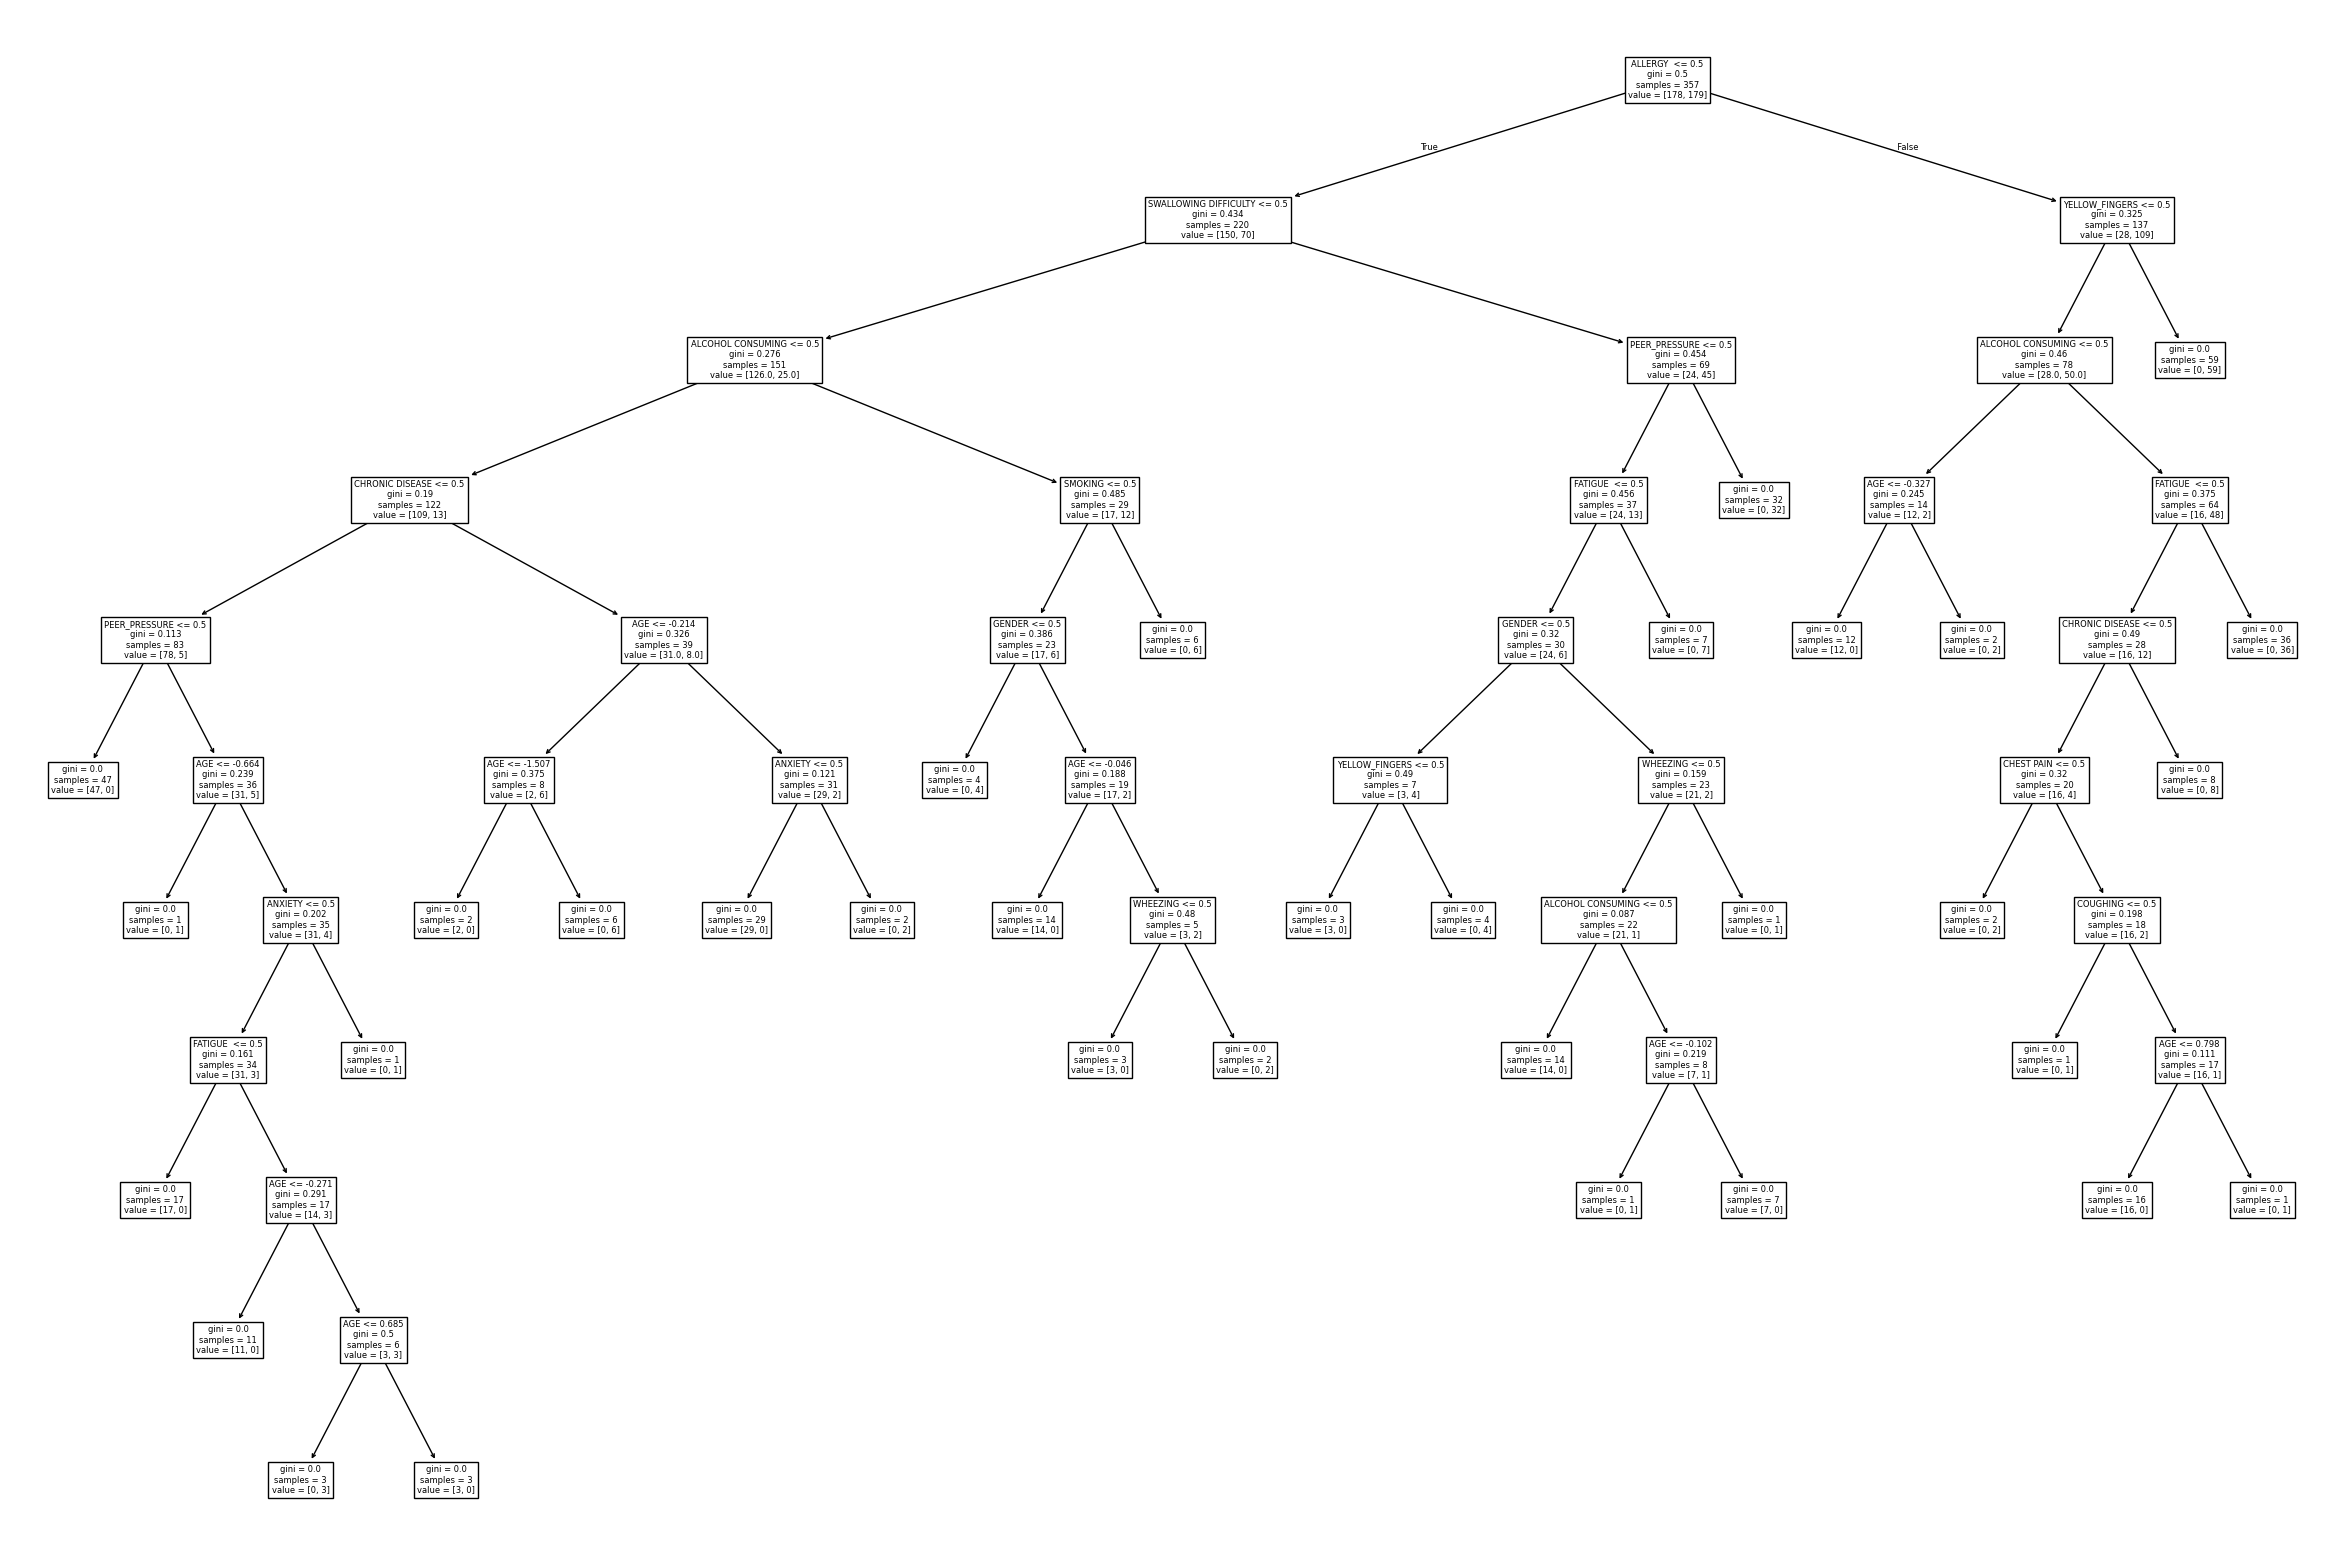

In [41]:
#Decision Tree
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

decitree = DecisionTreeClassifier(random_state = 42)
decitree = decitree.fit(X_train,y_train)
print(X.columns)
features = X.columns

plt.figure(figsize=(30, 20))
tree.plot_tree(decitree, feature_names=features)

y_pred = decitree.predict(X_test)
print("Train Data Accuracy: ",accuracy_score(y_true = y_train, y_pred = decitree.predict(X_train)))
print("Test Data Accuracy: ",accuracy_score(y_true = y_test, y_pred = y_pred))

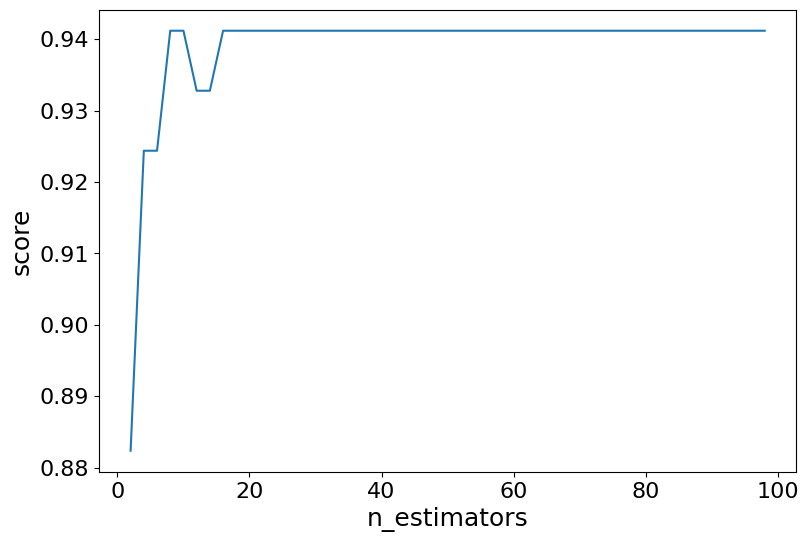

In [42]:
#Bootstrap Aggregation -- Decision Tree
from sklearn.ensemble import BaggingClassifier
estimator_range = range(2,100,2)
models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 42)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()
#use n_estimators = 100 for randomstate = 42

Accuracy: 0.9607843137254902


[Text(0.6428571428571429, 0.9444444444444444, 'SWALLOWING DIFFICULTY <= 0.5\ngini = 0.5\nsamples = 225\nvalue = [173.0, 184.0]'),
 Text(0.39285714285714285, 0.8333333333333334, 'ALLERGY  <= 0.5\ngini = 0.437\nsamples = 141\nvalue = [155, 74]'),
 Text(0.5178571428571429, 0.8888888888888888, 'True  '),
 Text(0.25, 0.7222222222222222, 'WHEEZING <= 0.5\ngini = 0.226\nsamples = 91\nvalue = [127, 19]'),
 Text(0.14285714285714285, 0.6111111111111112, 'YELLOW_FINGERS <= 0.5\ngini = 0.107\nsamples = 65\nvalue = [100, 6]'),
 Text(0.10714285714285714, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [80, 0]'),
 Text(0.17857142857142858, 0.5, 'FATIGUE  <= 0.5\ngini = 0.355\nsamples = 15\nvalue = [20, 6]'),
 Text(0.14285714285714285, 0.3888888888888889, 'AGE <= 0.798\ngini = 0.227\nsamples = 13\nvalue = [20, 3]'),
 Text(0.10714285714285714, 0.2777777777777778, 'AGE <= -0.945\ngini = 0.165\nsamples = 12\nvalue = [20, 2]'),
 Text(0.07142857142857142, 0.16666666666666666, 'ANXIETY <= 0.5\ngini = 0.48\nsamples 

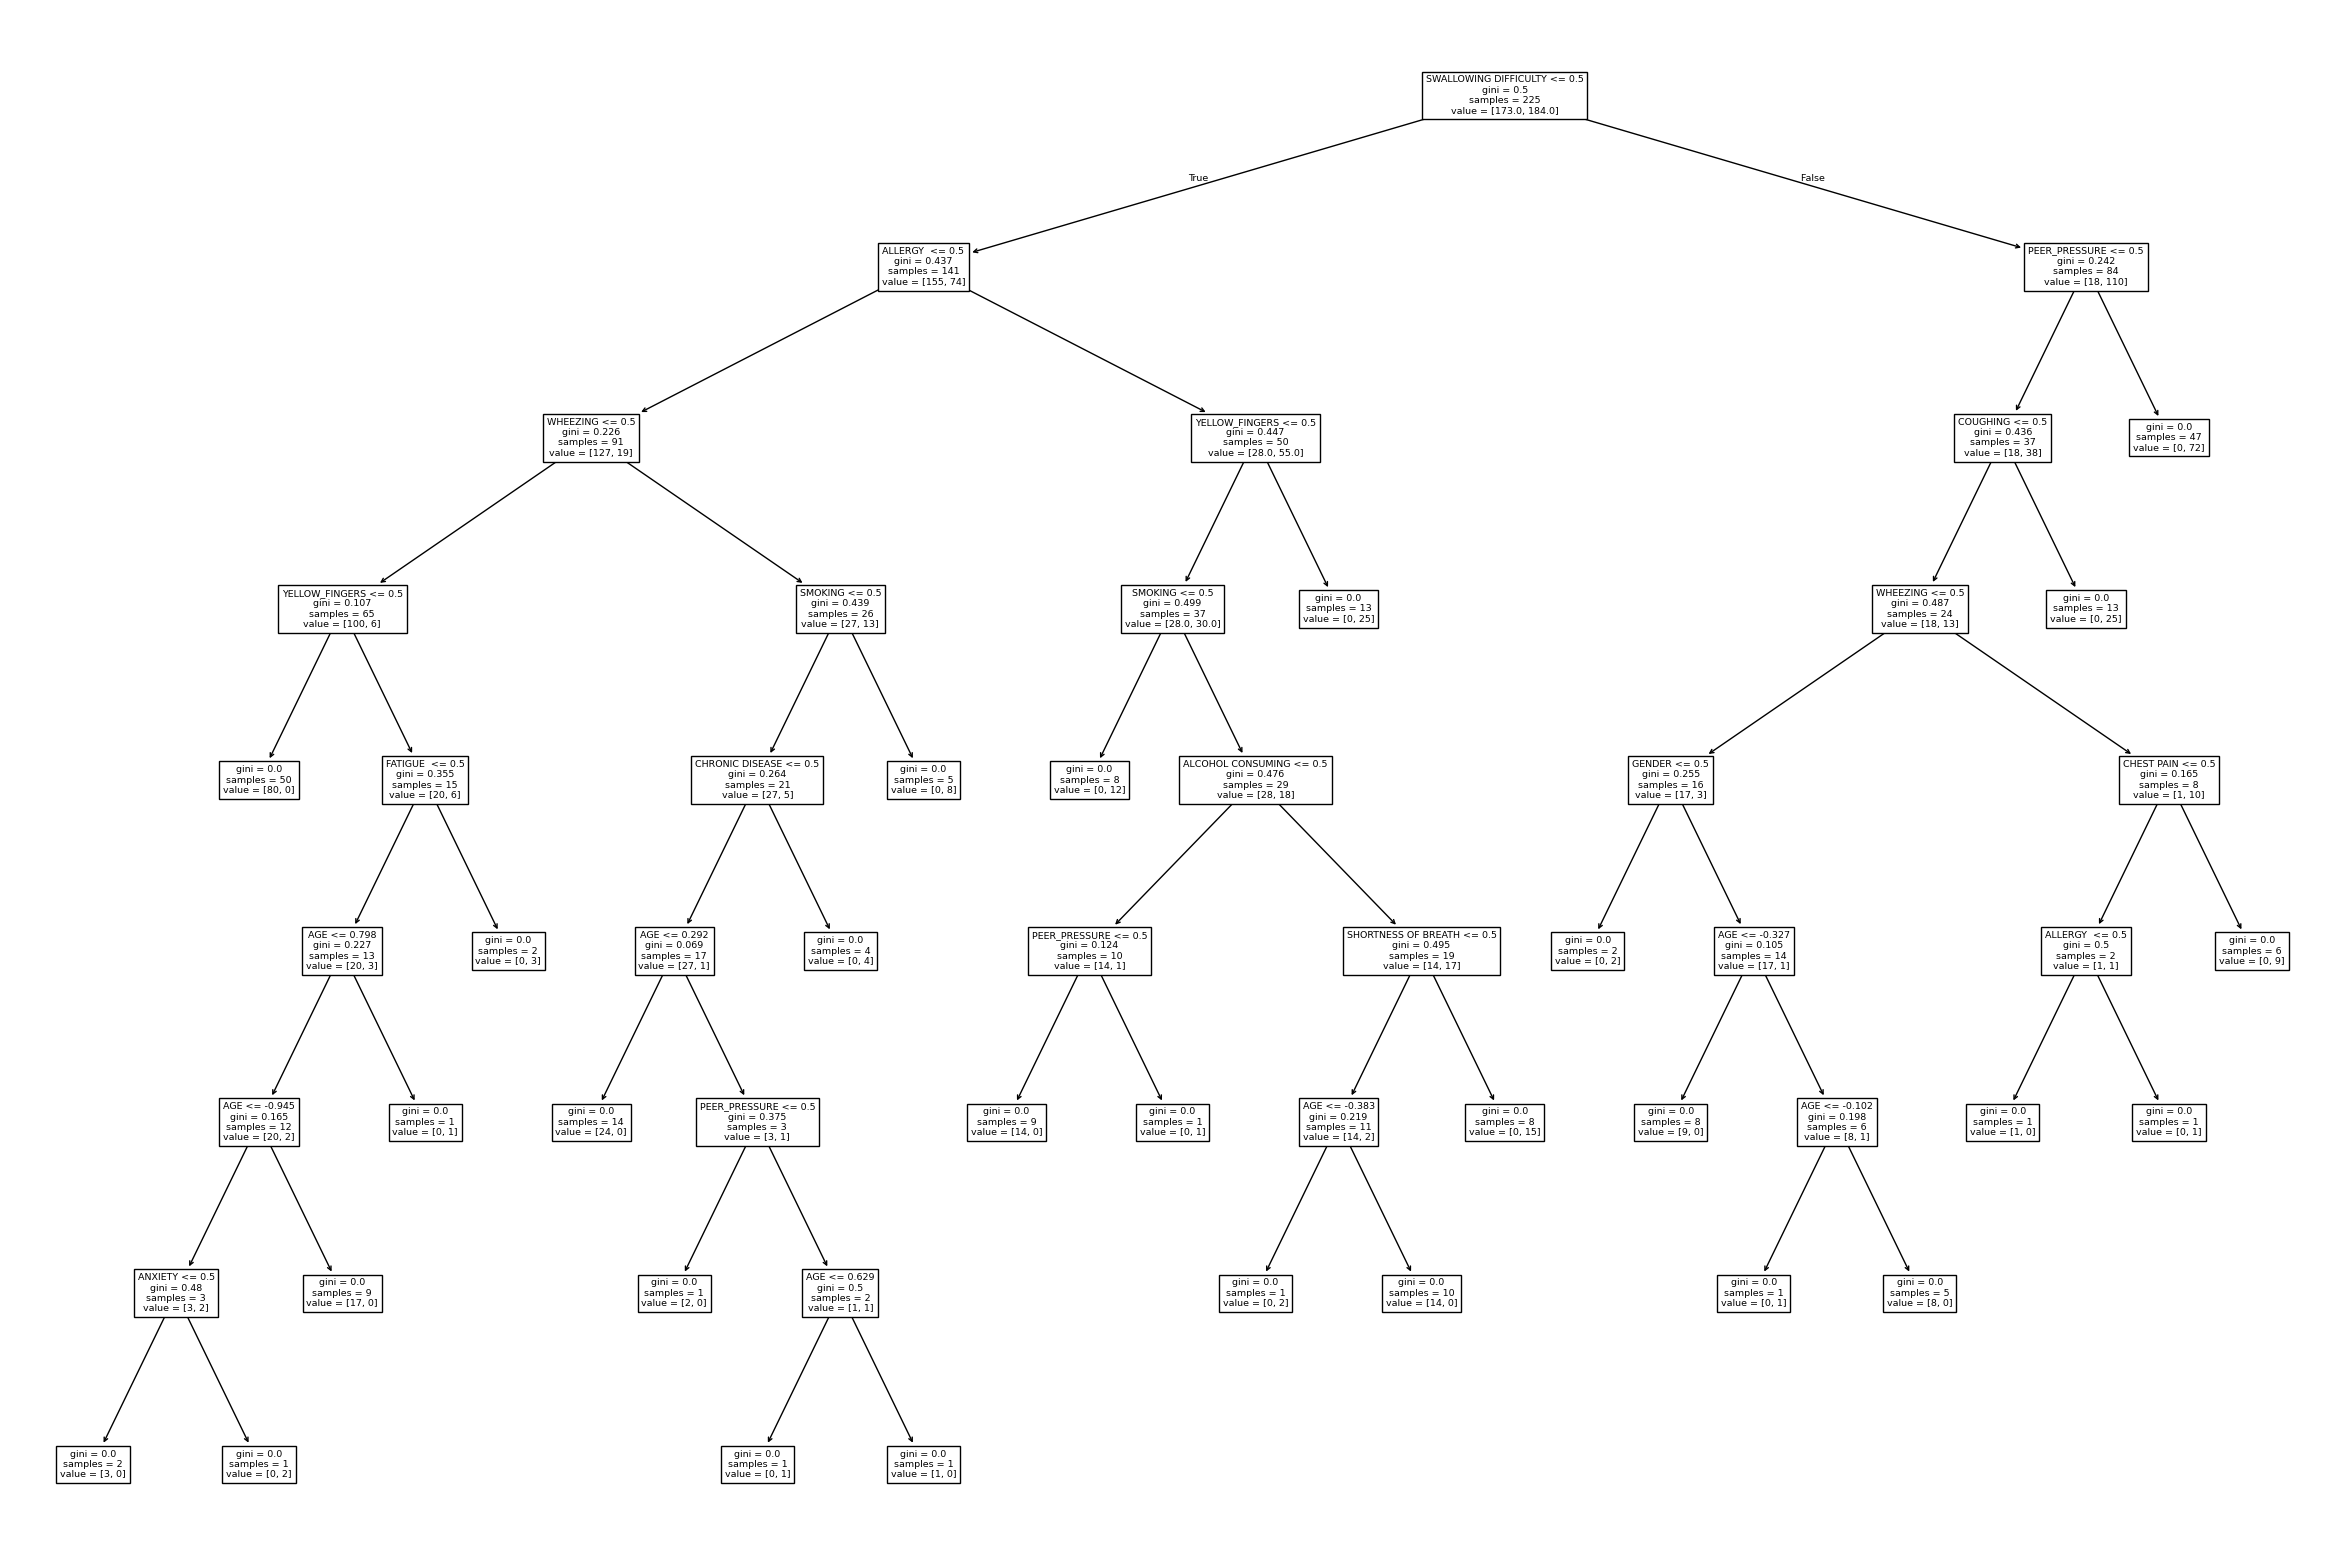

In [43]:
#out-of-bag metric -- Improving Decision Tree
from sklearn.ensemble import BaggingClassifier

oob_model = BaggingClassifier(n_estimators = 100, oob_score = True,random_state = 42)
oob_model.fit(X_train, y_train)
print("Accuracy:",oob_model.oob_score_)

plt.figure(figsize=(30, 20))
tree.plot_tree(oob_model.estimators_[0], feature_names = features)

In [44]:
#Cross Validation -- Further Improving Decicision Tree
#K-Fold
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, LeaveOneOut, LeavePOut, ShuffleSplit

clf = BaggingClassifier(n_estimators = 100,random_state=42) 
#DecisionTreeClassifier(random_state=42)
#first try -- splits as 5 folds
k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf, X, y, cv = k_folds)
print("K-Fold\nCross Validation Scores: ", scores , "\nAverage Cross Validation Score: ", scores.mean() , "\nNumber of Cross Validation Scores used in Average: ", len(scores))
print("---------------------------------------------")

#Stratified K-Fold
sk_folds = StratifiedKFold(n_splits = 5)
scores = cross_val_score(clf, X, y, cv = sk_folds)
print("SK-Fold\nCross Validation Scores: ", scores , "\nAverage Cross Validation Score: ", scores.mean() , "\nNumber of Cross Validation Scores used in Average: ", len(scores))
print("---------------------------------------------")

#Leave-One-Out
loo = LeaveOneOut()
scores = cross_val_score(clf, X, y, cv = loo)
print("LOO\nCross Validation Scores: ", scores , "\nAverage Cross Validation Score: ", scores.mean() , "\nNumber of Cross Validation Scores used in Average: ", len(scores))
print("---------------------------------------------")

K-Fold
Cross Validation Scores:  [0.80357143 0.94545455 0.89090909 0.94545455 0.90909091] 
Average Cross Validation Score:  0.8988961038961039 
Number of Cross Validation Scores used in Average:  5
---------------------------------------------
SK-Fold
Cross Validation Scores:  [0.85714286 0.85454545 0.89090909 0.94545455 0.90909091] 
Average Cross Validation Score:  0.8914285714285715 
Number of Cross Validation Scores used in Average:  5
---------------------------------------------
LOO
Cross Validation Scores:  [1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 

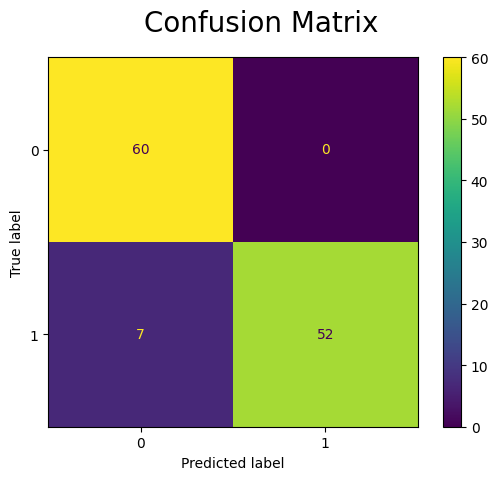

Accuracy:  0.9411764705882353 
Precision:  1.0 
Sensitivity/recall:  0.8813559322033898 
Specificity:  1.0 
F1 Score:  0.9369369369369369
Decision Tree Model AUC score: 0.9741525423728814


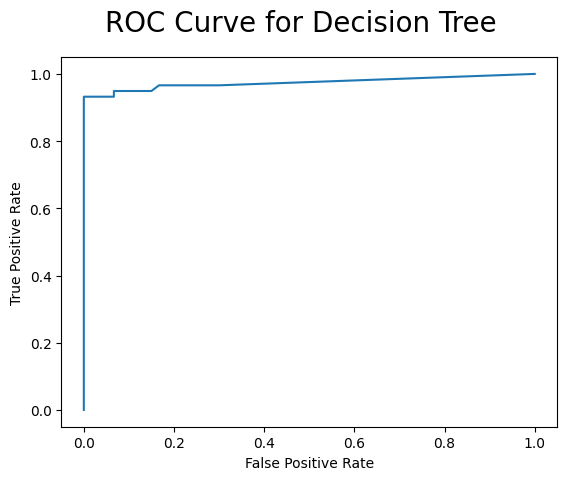

In [45]:
#Confusion Matrix -- Determining indicators for the model
predicted = oob_model.predict(X_test)
actual = y_test
#print(actual, predicted)

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.suptitle("Confusion Matrix",fontsize=20)
plt.show()

Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted)
Sensitivity_recall = metrics.recall_score(actual, predicted)
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
F1_score = metrics.f1_score(actual, predicted)
print("Accuracy: ", Accuracy,"\nPrecision: ", Precision, "\nSensitivity/recall: ", Sensitivity_recall, "\nSpecificity: ", Specificity, "\nF1 Score: ", F1_score)

#ROC&AUC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

predictproba = oob_model.predict_proba(X_test)
enterproba = []
for i in predictproba:
    enterproba.append(i[1])
#print(enterproba)

def plt_roc(T_y, P_y):
    fpr, tpr, thresholds = roc_curve(T_y, P_y)
    plt.plot(fpr, tpr)
    plt.suptitle("ROC Curve for Decision Tree",fontsize=20)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plt_roc(y_test, enterproba)
print(f'Decision Tree Model AUC score: {roc_auc_score(y_test, enterproba)}')

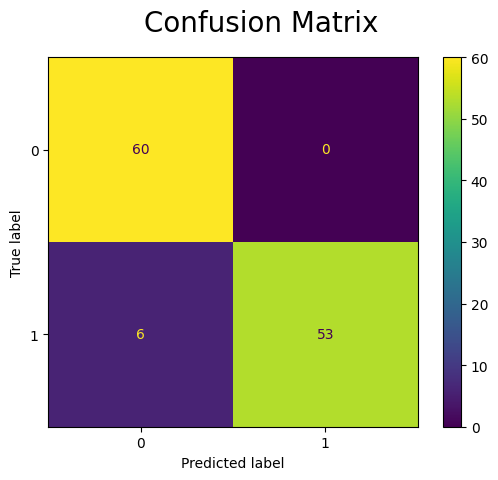

SVM model best parameters:  {'gamma': 10, 'C': 100}
Accuracy:  0.9831932773109243 
Precision:  1.0 
Sensitivity/recall:  0.9661016949152542 
Specificity:  1.0 
F1 Score:  0.9827586206896551
Support Vector Machine AUC score 0.9830508474576272


In [46]:
#Support Vector Machine
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

test_for_best_param={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
svm=RandomizedSearchCV(SVC(),test_for_best_param,cv=5)
svm.fit(X_train,y_train)
y_pred_svm=svm.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.suptitle("Confusion Matrix",fontsize=20)
plt.show()
print("SVM model best parameters: ", svm.best_params_)

actual = y_test
predicted = y_pred_svm
Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted)
Sensitivity_recall = metrics.recall_score(actual, predicted)
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
F1_score = metrics.f1_score(actual, predicted)
print("Accuracy: ", Accuracy,"\nPrecision: ", Precision, "\nSensitivity/recall: ", Sensitivity_recall, "\nSpecificity: ", Specificity, "\nF1 Score: ", F1_score)
print("Support Vector Machine AUC score", metrics.roc_auc_score(actual, predicted))